In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('downloads/IMDB Dataset.csv')

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [3]:
sentiments = data['sentiment']
sentiments = sentiments.replace({"positive": 1, "negative": 0})

2.Define a text preprocessing pipeline, i.e., stopword removal, lower casing, punctuation removal etc
1.Define your own train-val-test split. Ratio : (train: 18: test : 5 , val : 2)

In [4]:
import nltk
import re
nltk.download('stopwords')

from nltk.corpus import stopwords 
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = text.replace('x', '')
    text = text.replace('\d+', '')
    
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

reviews =data['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
X_train, X_test, y_train, y_test = train_test_split(reviews,sentiments,test_size=0.2, random_state=1)
X_train,X_val, y_train, y_val =train_test_split(X_train, y_train,test_size=0.1, random_state=1 )

In [6]:
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)

(10000,)
(36000,)
(4000,)


Developing ML methods:
1. Model a Naive Bayes classifier.
a. Count vectorizer features.
b. TF-IDF features.


In [7]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
clf = MultinomialNB()
clf.fit(X_train_count, y_train)

X_test_count = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_count)
accuracy = accuracy_score(y_test, y_pred)


In [8]:
print(accuracy*100)

86.16


In [9]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

X_test_tfidf = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred)

In [10]:
print(accuracy_tfidf*100)

86.91


3. ii ) Model a decision tree with TF-IDF features

In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)
accuracy_dec = accuracy_score(y_test, y_pred)

In [12]:
print(accuracy_dec*100)

71.74000000000001


4. Developing Deep neural networks:

    a. RNN model.
    
      1. 64 hidden-vector dimension.


In [13]:
# helps in model building
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import InputLayer
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.callbacks import EarlyStopping

In [14]:
# helps in text preprocessing
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts(X_train)

In [15]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
encoded_val = t.texts_to_sequences(X_val)
print(encoded_train[0:2])

[[1148, 3671, 9852, 849, 1119, 376, 21997, 51, 34614, 1639, 58, 93, 89, 1417, 3587, 536, 1739, 2053, 23070, 1246, 68414, 17410, 1701, 90, 13784, 2988, 1, 21, 42, 63, 4406, 4239, 136, 5, 10514, 52, 86, 70, 21998, 1601, 51, 86, 6, 2, 521, 700, 81, 415, 2325, 921, 3, 158, 921, 104, 511, 13, 13, 45], [14, 255, 4966, 3760, 10326, 345, 42, 99, 1588, 14928, 2471, 40, 496, 38398, 126, 6151, 2374, 162, 155, 1155, 3207, 124, 395, 78, 337, 13161, 5, 39, 1848, 3461, 43767, 22, 1853, 9252, 1, 124, 61, 42, 128, 817, 2149, 187, 719, 468, 151, 145, 44, 419, 54, 817, 416, 42, 735, 7, 3497, 5, 369, 596, 21022, 1015, 51982, 1, 42, 183, 821, 2919, 14, 5, 249, 68415, 1002, 8612, 6208, 54, 817, 2567, 5, 1890, 50, 7968, 250, 4101, 2316, 54, 685, 335, 12584, 1, 1716, 99, 1525, 1616, 409, 70, 118, 108, 1442, 266, 187, 12306, 6387, 77, 127, 8494, 2283, 298, 2132, 12306, 37, 1566, 5268, 43768, 304, 68416, 4223, 817, 1008, 1222, 1027, 97, 15, 1483, 56, 94, 176, 409, 1303, 42, 12584, 1, 11, 441, 354, 47, 5311, 104

In [16]:
max_length = 64
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
padded_val = pad_sequences(encoded_val, maxlen=max_length, padding='post')
print(padded_train)

[[  1148   3671   9852 ...      0      0      0]
 [    97     15   1483 ...     42     54    809]
 [ 43769   7556    490 ...    258     47  68421]
 ...
 [    47   3480      4 ...   1285   1347   2052]
 [  3017   3017 139062 ...   8505  20062    503]
 [   110   1339   5355 ...      0      0      0]]


In [17]:
vocab_size = len(t.word_index) + 1
# define the model
RNNModel64 = Sequential(name="SimpleRNNModel64")
RNNModel64.add(Embedding(vocab_size, 64, input_length=max_length))
RNNModel64.add(SimpleRNN(64, return_sequences=False))
RNNModel64.add(Dense(1, activation='sigmoid'))

# compile the model
RNNModel64.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(RNNModel64.summary())

Model: "SimpleRNNModel64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 64)            8900032   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 8,908,353
Trainable params: 8,908,353
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
def plot_training_graph(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/100
1125/1125 [==============================] - 46s 40ms/step - loss: 0.4773 - accuracy: 0.7568 - val_loss: 0.3692 - val_accuracy: 0.8487
Epoch 2/100
1125/1125 [==============================] - 45s 40ms/step - loss: 0.2955 - accuracy: 0.8833 - val_loss: 0.3364 - val_accuracy: 0.8625
Epoch 3/100
1125/1125 [==============================] - 45s 40ms/step - loss: 0.2160 - accuracy: 0.9181 - val_loss: 0.3772 - val_accuracy: 0.8353
Epoch 4/100
1125/1125 [==============================] - 46s 41ms/step - loss: 0.1389 - accuracy: 0.9508 - val_loss: 0.4403 - val_accuracy: 0.8490
Epoch 5/100
1125/1125 [==============================] - 46s 41ms/step - loss: 0.0867 - accuracy: 0.9720 - val_loss: 0.5424 - val_accuracy: 0.8470
Epoch 6/100
1125/1125 [==============================] - 47s 42ms/step - loss: 0.0626 - accuracy: 0.9812 - val_loss: 0.5538 - val_accuracy: 0.8170
Epoch 7/100
1125/1125 [==============================] - 47s 41ms/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0

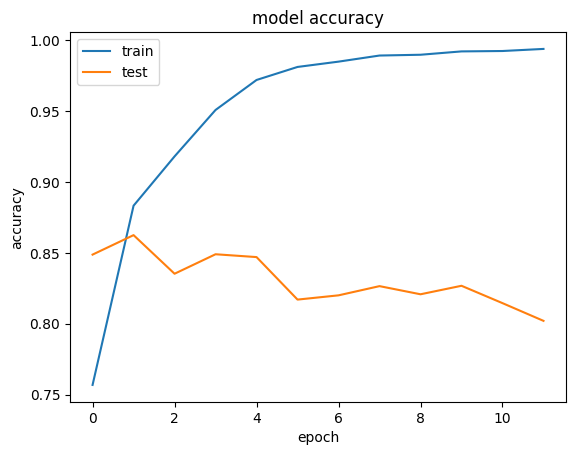

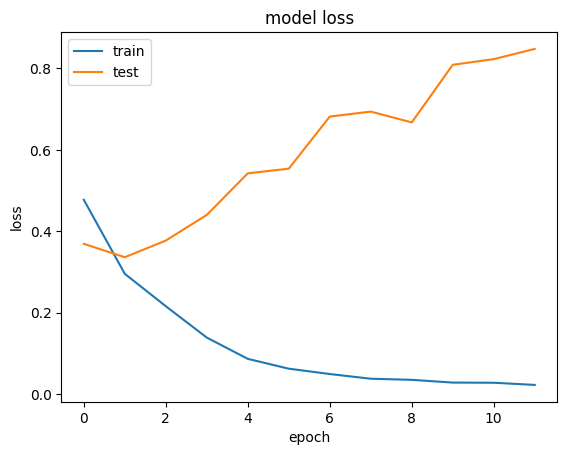

In [19]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
history = RNNModel64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [21]:
preds_rnn_64 = (RNNModel64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 3ms/step


In [22]:
c_report(y_test, preds_rnn_64)

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      5044
           1       0.81      0.82      0.81      4956

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Accuracy : 0.8162


0.8162

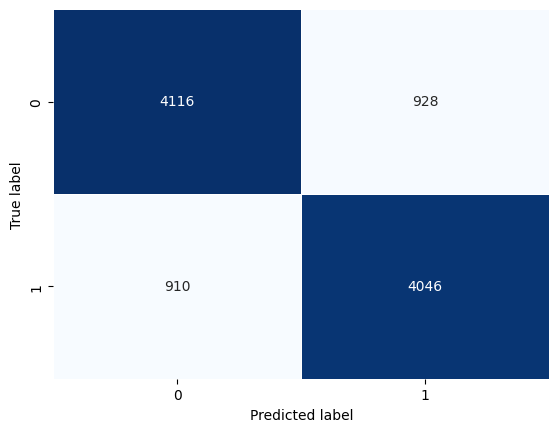

In [23]:
plot_confusion_matrix(y_test, preds_rnn_64)

4. Developing Deep neural networks:

    a. RNN model.
    
      2. 256 hidden-vector dimension.


In [24]:
# define the model
RNNModel256 = Sequential(name="SimpleRNNModel256")
RNNModel256.add(Embedding(vocab_size, 256, input_length=max_length))
RNNModel256.add(SimpleRNN(256, return_sequences=False))
RNNModel256.add(Dense(1, activation='sigmoid'))

# compile the model
RNNModel256.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(RNNModel256.summary())

Model: "SimpleRNNModel256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 64, 256)           35600128  
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 35,731,713
Trainable params: 35,731,713
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
1125/1125 [==============================] - 175s 155ms/step - loss: 0.6844 - accuracy: 0.5420 - val_loss: 0.6577 - val_accuracy: 0.5738
Epoch 2/100
1125/1125 [==============================] - 174s 155ms/step - loss: 0.6182 - accuracy: 0.6404 - val_loss: 0.6571 - val_accuracy: 0.6750
Epoch 3/100
1125/1125 [==============================] - 172s 153ms/step - loss: 0.5394 - accuracy: 0.7264 - val_loss: 0.6074 - val_accuracy: 0.6683
Epoch 4/100
1125/1125 [==============================] - 173s 153ms/step - loss: 0.4942 - accuracy: 0.7578 - val_loss: 0.5494 - val_accuracy: 0.7400
Epoch 5/100
1125/1125 [==============================] - 178s 158ms/step - loss: 0.4468 - accuracy: 0.7888 - val_loss: 0.5444 - val_accuracy: 0.7483
Epoch 6/100
1125/1125 [==============================] - 182s 162ms/step - loss: 0.4008 - accuracy: 0.8177 - val_loss: 0.5798 - val_accuracy: 0.7707
Epoch 7/100
1125/1125 [==============================] - 181s 161ms/step - loss: 0.3853 - accuracy: 0.8268

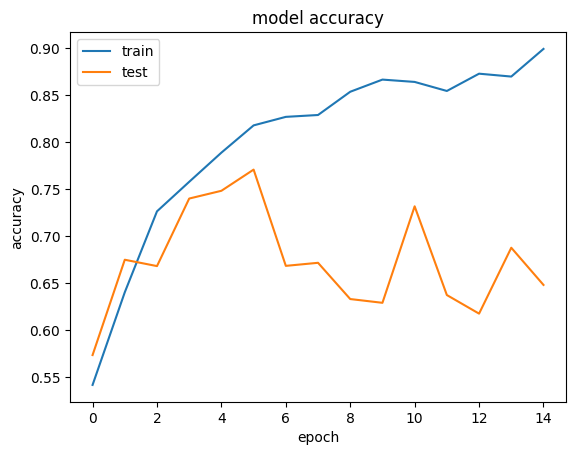

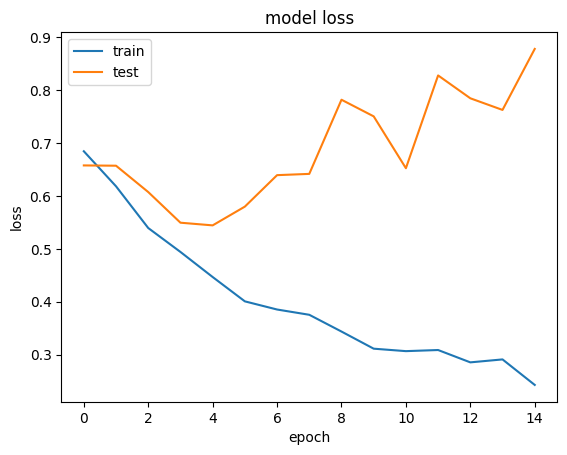

In [25]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
history = RNNModel256.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [26]:
preds_rnn_256 = (RNNModel256.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 3s 10ms/step


In [27]:
c_report(y_test, preds_rnn_256)

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      5044
           1       0.65      0.56      0.60      4956

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000

Accuracy : 0.6328


0.6328

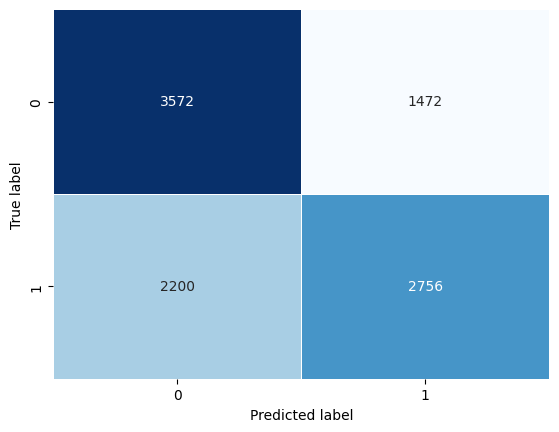

In [28]:
plot_confusion_matrix(y_test, preds_rnn_256)